<a href="https://colab.research.google.com/github/Cristian-Rojas2/TalentoTech/blob/main/Uso_de_APIs_Real_Time_Ingest_Data_API_WeatherCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan las librerias
import requests
import json
import pandas as pd

In [2]:
API_KEY = '59b2c42575040e71495a57891b509a79'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [3]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 14.72°C


In [6]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '59b2c42575040e71495a57891b509a79'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué', 'Villavicencio', 'Manizales']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

           Ciudad  Temperatura
0          Bogota        14.50
1        Medellin        20.58
2            Cali        21.12
3    Barranquilla        27.88
4       Cartagena        28.79
5          Cúcuta        26.97
6     Bucaramanga        22.27
7         Pereira        14.56
8     Santa Marta        28.98
9          Ibagué        17.61
10  Villavicencio        23.11
11      Manizales        10.29


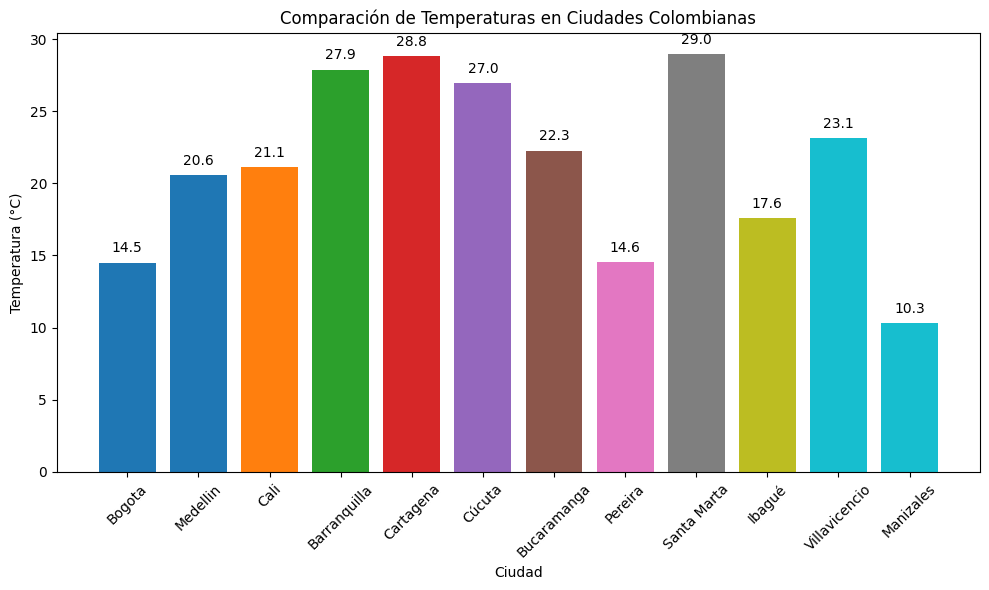

In [10]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.tab10(np.linspace(0, 1, len(df_temperatura['Ciudad'])))
plt.figure(figsize=(10, 6))

bars = plt.bar(df_temperatura['Ciudad'], df_temperatura['Temperatura'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,
        f'{yval:.1f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel('Ciudad')
plt.ylabel('Temperatura (°C)')
plt.title('Comparación de Temperaturas en Ciudades Colombianas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()